# Clustering and Frequent Item Sets

#### In this instruction, you will learn how to use K-means, DBSCAN, agglomerative hierarchical algorithms for clustring and Apriori and FP-Growth algorithms for frequent itemsets mining in python.


The following libraries are used in this training notebook:
- pandas
- numpy
- matplotlib
- mlxtend
- sklearn

In [26]:
# Import packages
import numpy as np
import pandas as pd
import csv
from matplotlib import pyplot as plt
import seaborn as sns

sns.set_palette("tab10")

%matplotlib inline

### Read data from Weather.csv

We use Weather.csv file as a data set for applying K-means clustering, DBSCAN clustering, Agglomerative hierarchical clustering. 

In [2]:
# Read data from the target CSV file 'Weather.csv'
weather = pd.read_csv('weather.csv')
weather.shape

(3000, 2)

In [3]:
# Show first five rows in 'weather'
weather.head(5)

Humidity  Temperature
0   2.072345    -3.241693
1  17.936710    15.784810
2   1.083576     7.319176
3  11.120670    14.406780
4  23.711550     2.557729

In [4]:
# Show last five rows in 'weather'
weather.tail(5)

Humidity  Temperature
2995  85.65280    -6.461061
2996  82.77088    -2.373299
2997  64.46532   -10.501360
2998  90.72282   -12.255840
2999  64.87976   -24.877310

In [5]:
# Show the name of the attributes in 'weather'
weather.columns

Index(['Humidity', 'Temperature'], dtype='object')

### Visualization of the data points

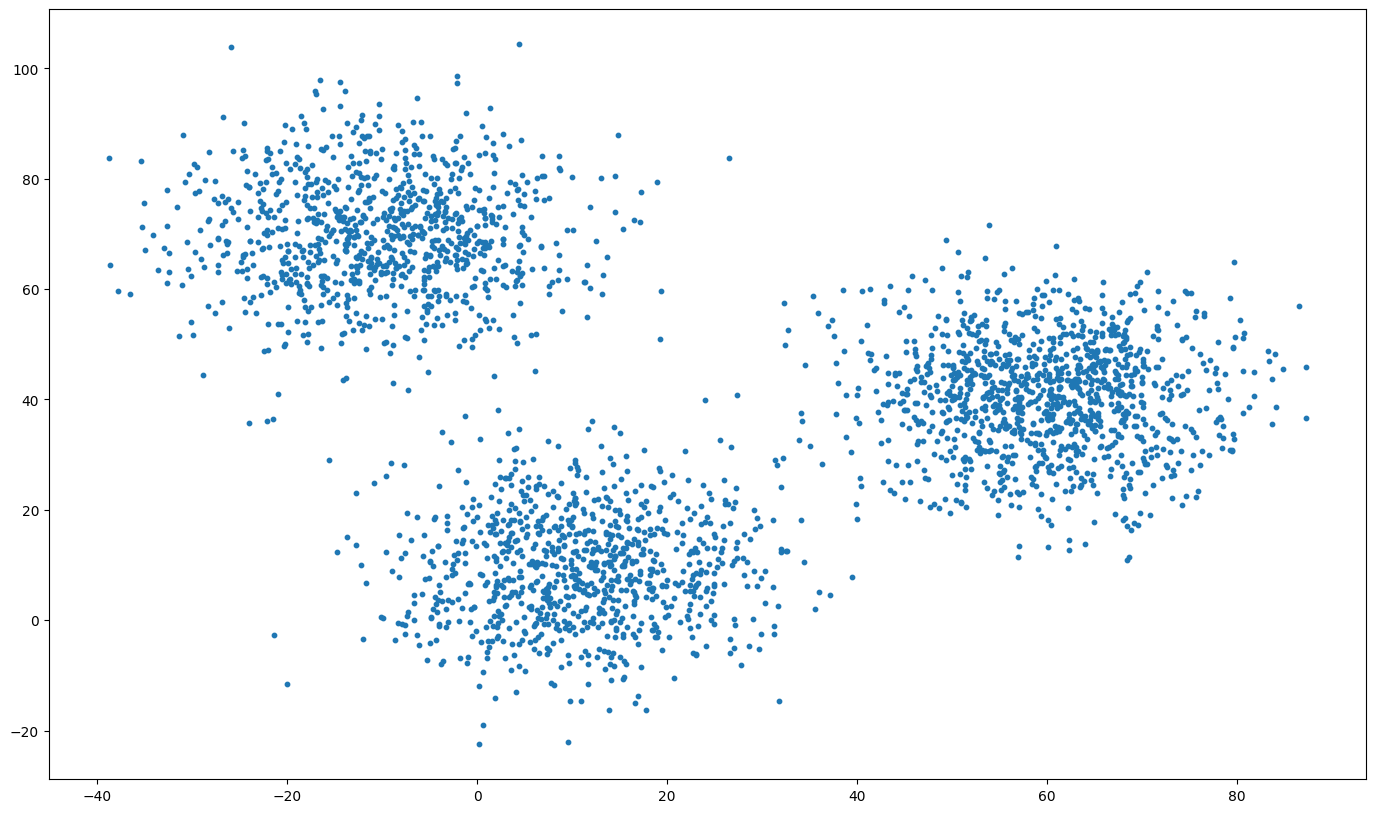

In [29]:
# illustrate the data points on a 2D plot.

temperature = weather['Temperature'].values
humidity = weather['Humidity'].values

plt.rcParams['figure.figsize'] = (17, 10)
plt.scatter(temperature, humidity, s=10)

##  Implementation of Clustering Algorithms
For applying K-means, DBSCAN and Agglomerative hierarchical clustering algorithms we can use sklearn library.

In [8]:
# Import k-means and DBSCAN and AgglomerativeClustering from sklearn

from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn.cluster import AgglomerativeClustering

###  K-means 

[[ 69.92418447 -10.11964119]
 [ 40.68362784  59.71589274]
 [  9.4780459   10.686052  ]]


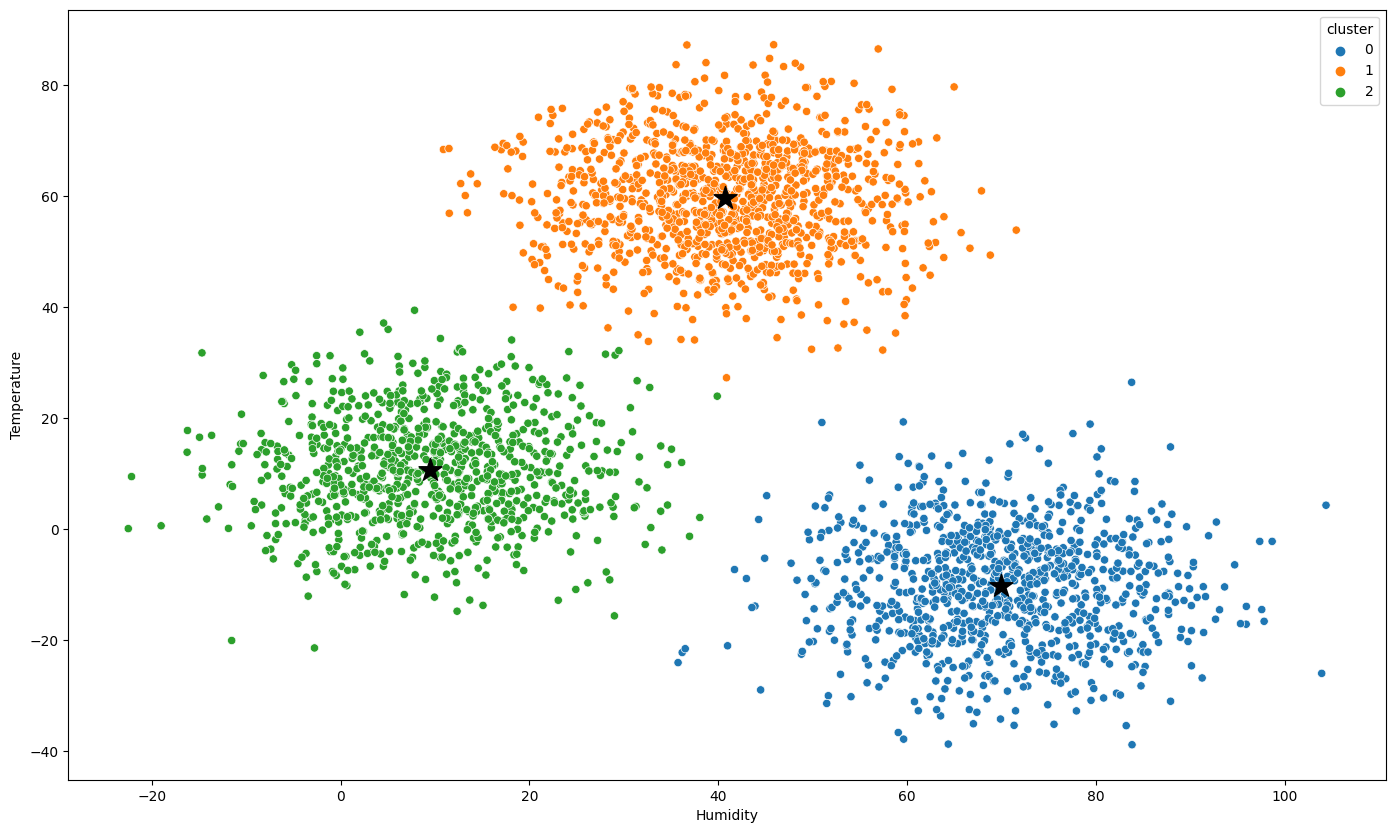

In [33]:
#Perform K-means algorithm using 3 as the number of clusters and visualize the resulting clusters on a 2D plot.

cluster_num = 3
kmeans = KMeans(n_clusters=cluster_num, n_init=10).fit(weather)
cl_weather = weather.assign(cluster = kmeans.labels_)

centroids = kmeans.cluster_centers_
print(centroids)

fig, plots = plt.subplots()
sns.scatterplot(data=cl_weather, x="Humidity", y="Temperature", hue=cl_weather.cluster, palette="tab10")
plots.scatter(centroids[:,0], centroids[:,1], marker = '*', s = 300, c = 'k')

#### Question: Change the 'cluster_num' parameter from 2 to 5. What is the best number of clusters?

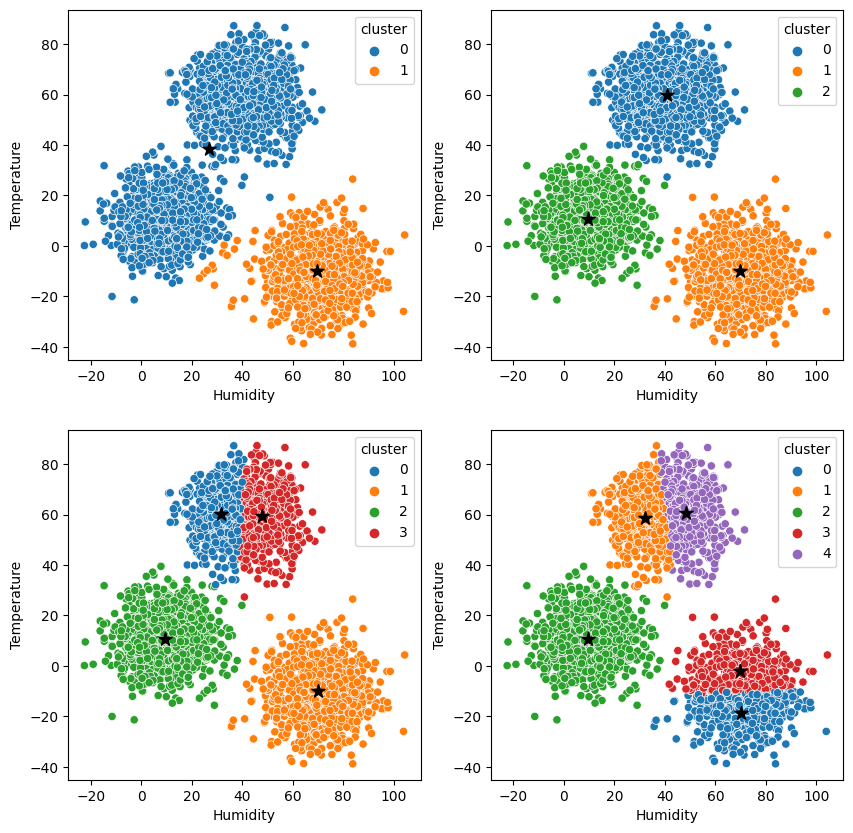

In [46]:
#Perform K-means algorithm by varying the number of clusters and visualize the resulting clusters on a 2D plot.
fig = plt.figure(figsize=(10, 10))
gs = fig.add_gridspec(2, 2)

for cluster_num in range(2, 6):
    kmeans = KMeans(n_clusters=cluster_num, n_init=10).fit(weather)
    cl_weather = weather.assign(cluster = kmeans.labels_)
    centroids = kmeans.cluster_centers_

    ax = fig.add_subplot(gs[cluster_num // 2 - 1, cluster_num % 2])
    sns.scatterplot(data=cl_weather, x="Humidity", y="Temperature", hue=cl_weather.cluster, palette="tab10")
    ax.scatter(centroids[:,0], centroids[:,1], marker = '*', s = 100, c = 'k')

### DBSCAN


[-1, 0, 1, 2]


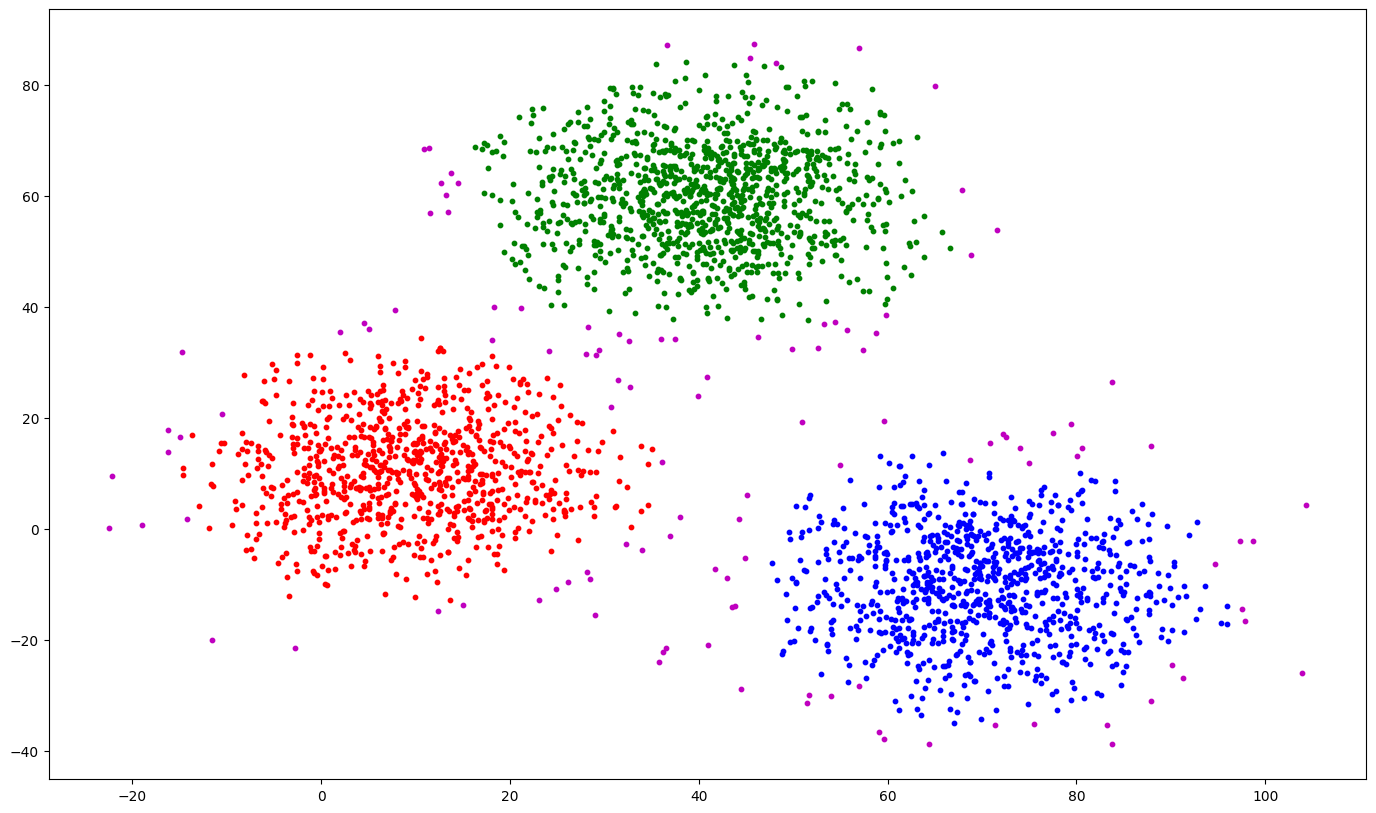

In [47]:
#Perform DBSCAN algorithm using eps = 4 and min_samples=8, and visualize the resulting clusters on a 2D plot.

dbscan = DBSCAN(eps = 4, min_samples=8).fit(weather)
clusters = dbscan.labels_
cluster_indexs = np.unique(clusters).tolist()
print(cluster_indexs)

fig, plots = plt.subplots()
colors = {-1 : 'm',
          0 : 'r',
          1 : 'g',
          2 : 'b',
          3 : 'y'}
for cluster_index in cluster_indexs :
    sub_set = np.array([weather.loc[i] for i in range(len(weather)) if clusters[i] == cluster_index])
    if len(sub_set) == 0 :
        continue
    plots.scatter(sub_set[:,0], sub_set[:,1], s = 10, c = colors[cluster_index])

#### Question: Change the 'eps' parameter from 4 to 7 and min_samples from 8 to 11. Which parameters are better for this clustering task?

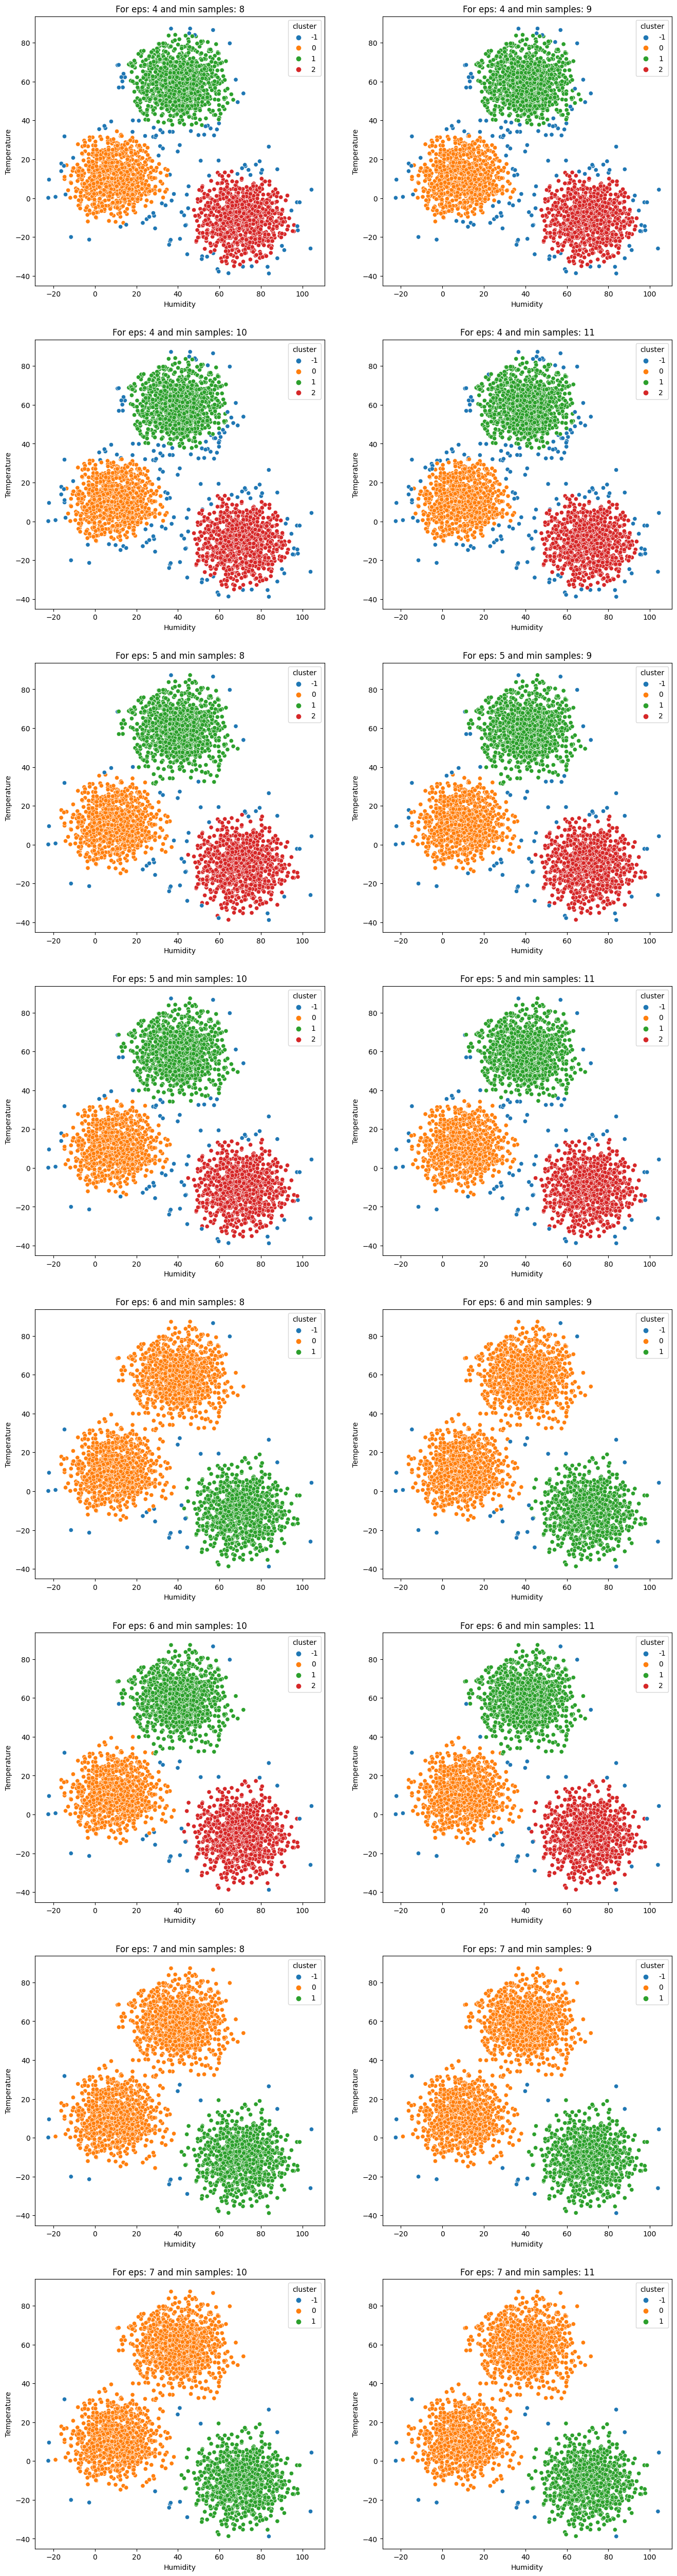

In [79]:
# Vary eps and min_samples

fig = plt.figure(figsize=(16, 64))
gs = fig.add_gridspec(8, 2)

ind = 1
for eps in range(4, 8):
    for min_samp in range (8, 12):
        dbscan = DBSCAN(eps = eps, min_samples=min_samp).fit(weather)
        cl_weather = weather.assign(cluster = dbscan.labels_)

        ax = fig.add_subplot(8,2,ind) 
        sns.scatterplot(data=cl_weather, x="Humidity", y="Temperature", hue=cl_weather.cluster, palette="tab10", ax=ax)
        ax.set_title("For eps: {0} and min samples: {1}".format(eps, min_samp))
        
        ind = ind+1

#### Question: Compare the results of DBSCAN and K-means algorithm.

We can see that while in DBSCAN some of the points are considered outliers is K-means every data point is part of a cluster.

### Agglomerative Clustering

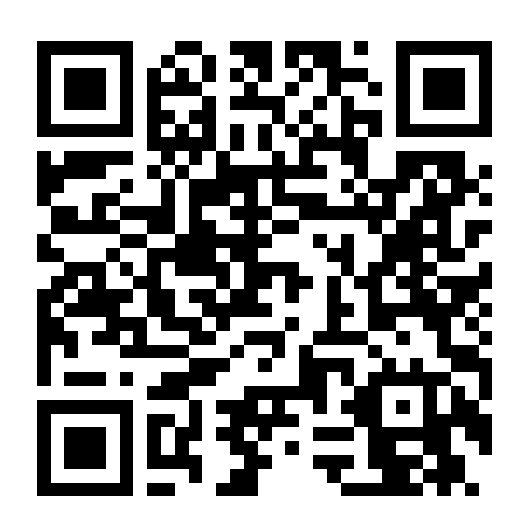

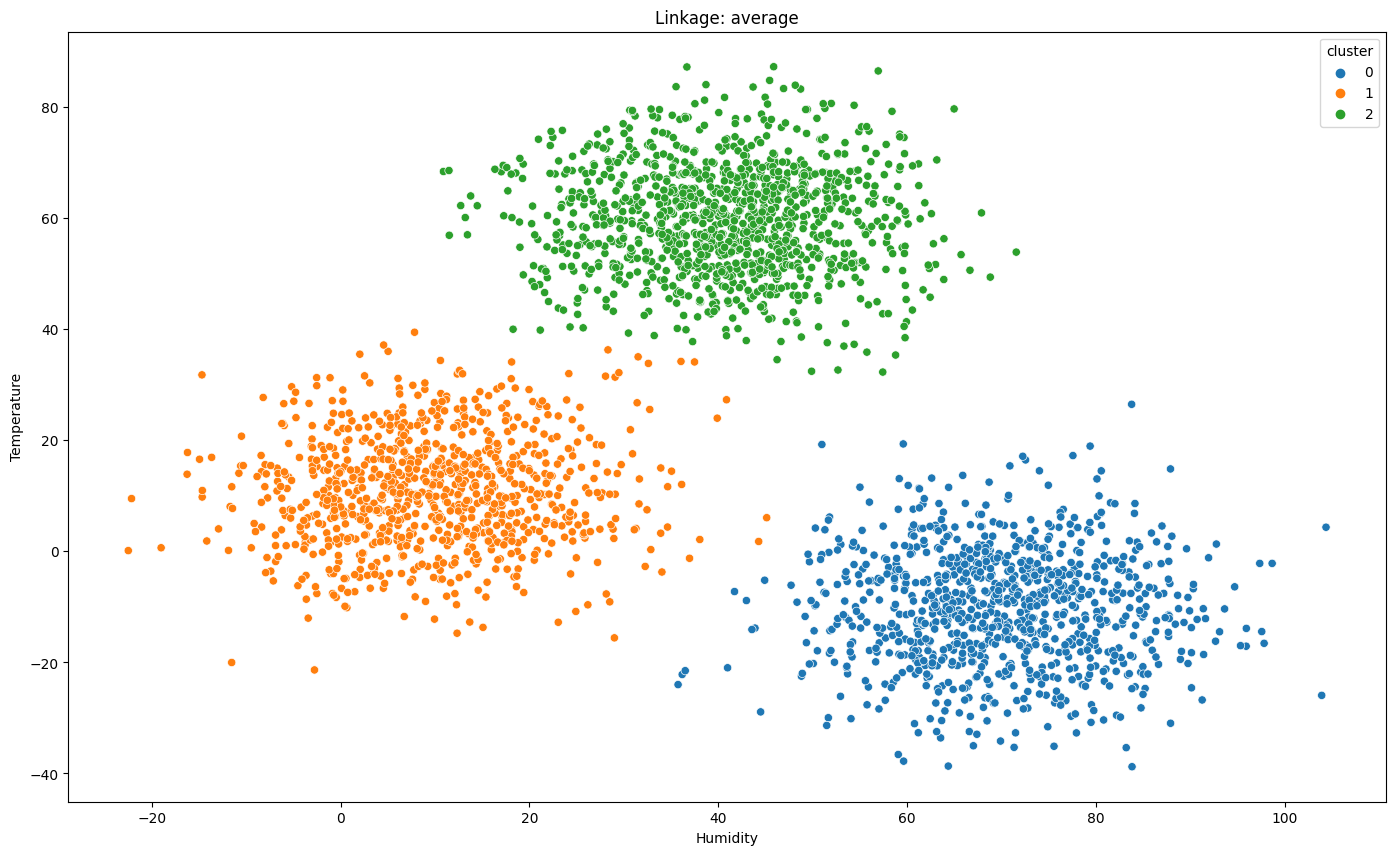

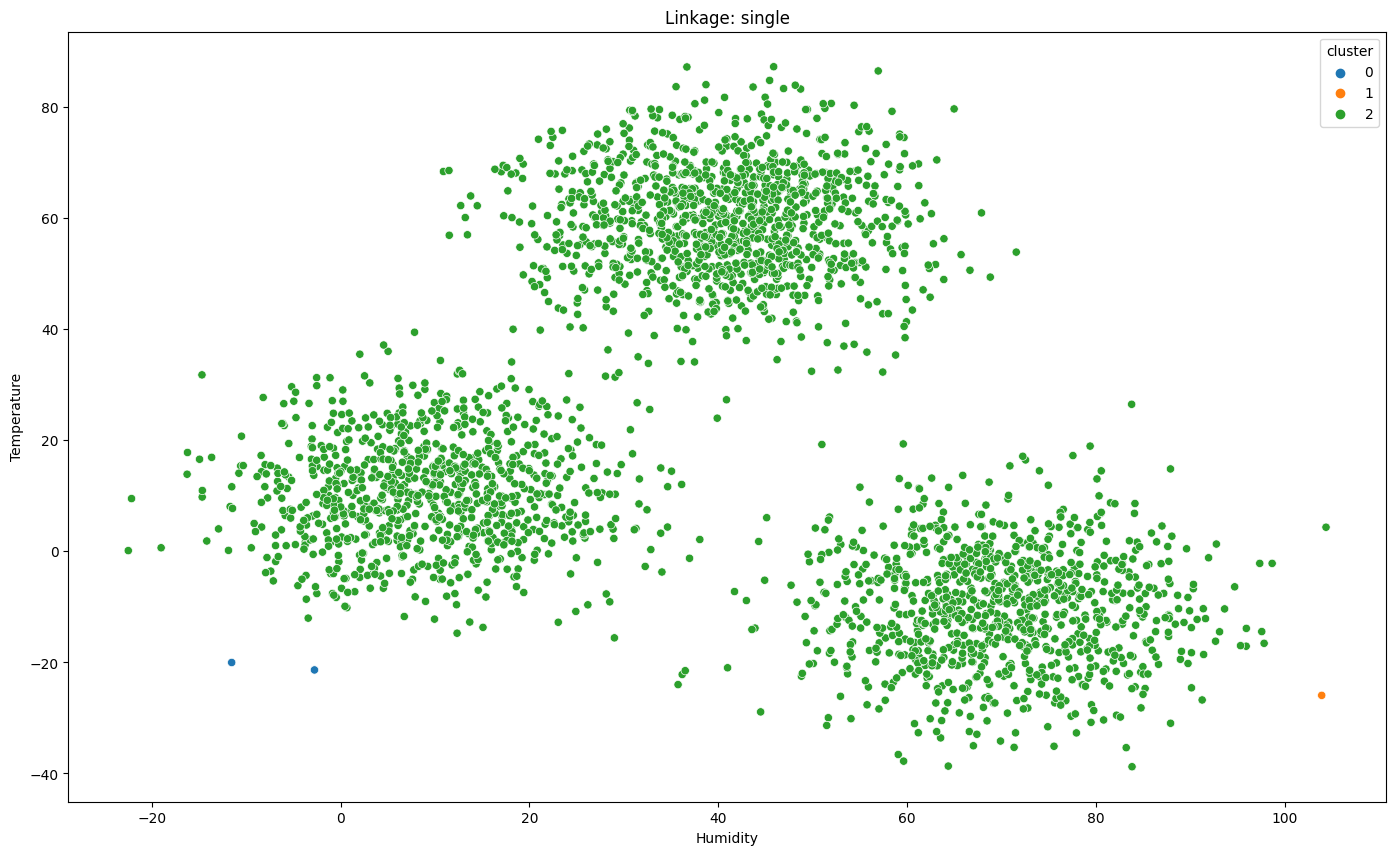

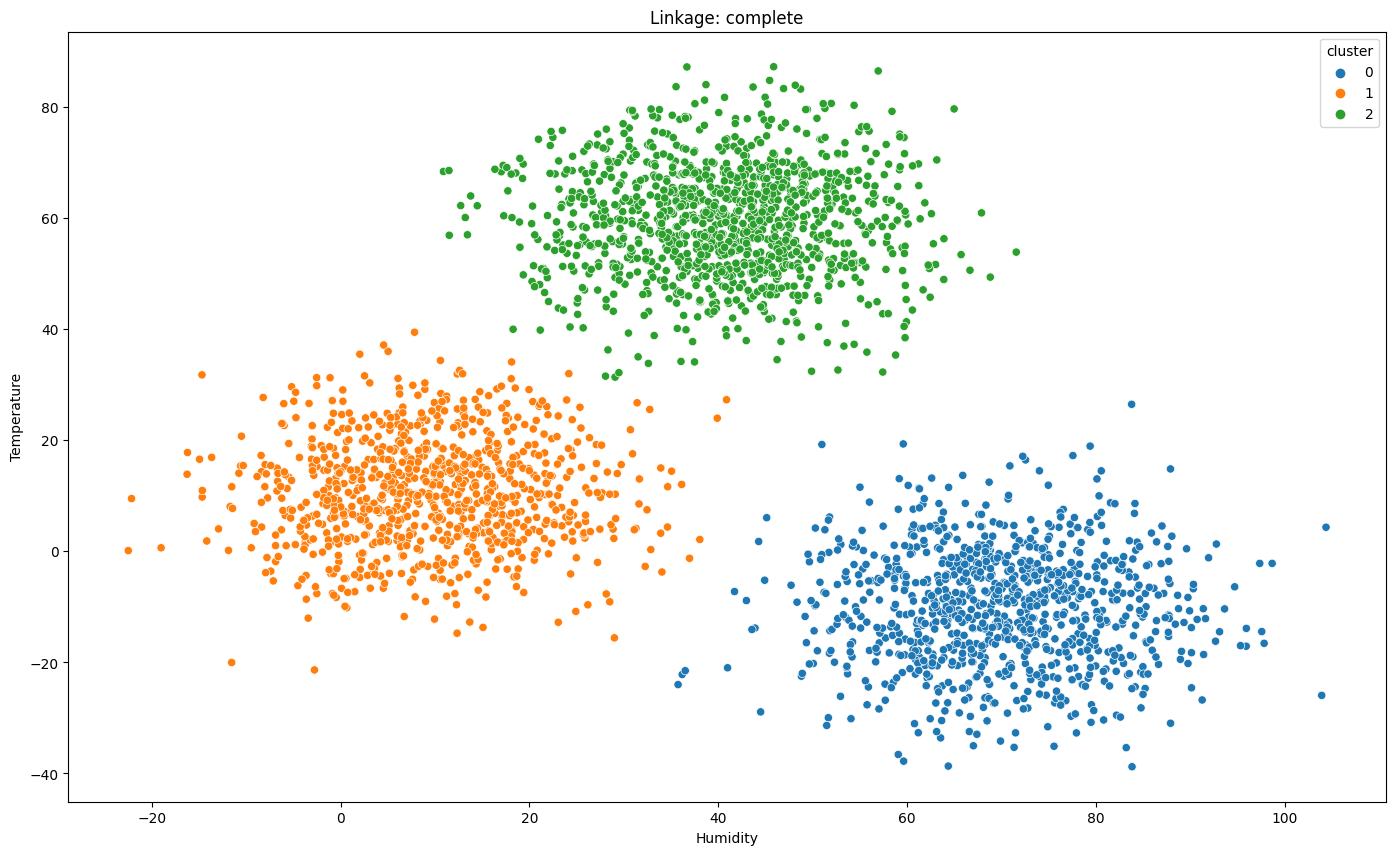

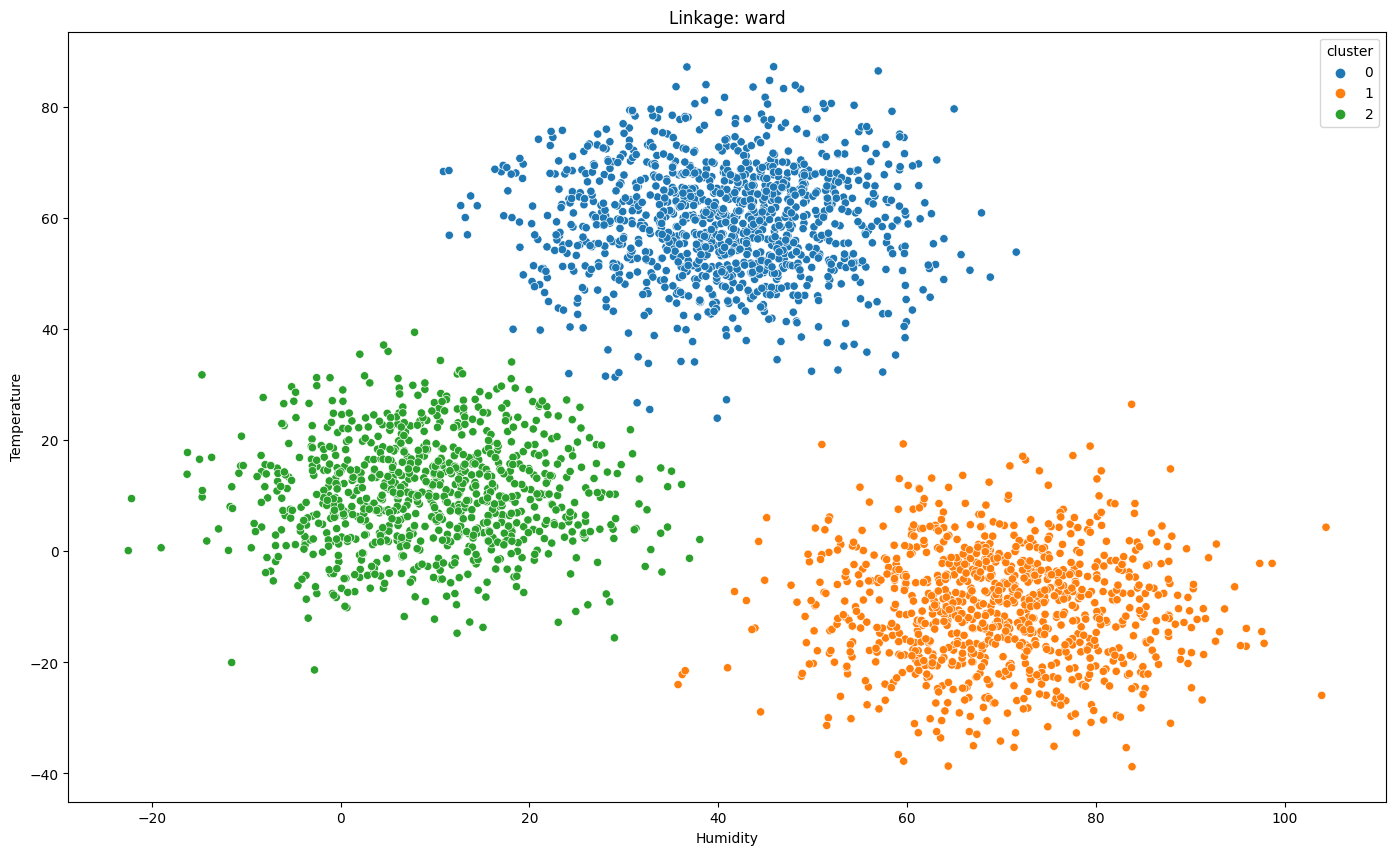

In [82]:
# Perform Agglomerative hierarchical clustering on weather_sampled dataset. Consider that we want to have three clusters after preforming clustering.

for linkage in ["average", "single", "complete", "ward"]:
    aggl = AgglomerativeClustering(n_clusters=3,linkage=linkage).fit(weather)
    cl_weather = weather.assign(cluster = aggl.labels_)

    fig, plots = plt.subplots()
    sns.scatterplot(data=cl_weather, x="Humidity", y="Temperature", hue=cl_weather.cluster, palette="tab10")
    plots.set_title("Linkage: " + linkage)

## Working with the Penguin dataset

In [127]:
# Read dataset

penguins = pd.read_csv("https://raw.githubusercontent.com/allisonhorst/palmerpenguins/c19a904462482430170bfe2c718775ddb7dbb885/inst/extdata/penguins.csv")

# drop nan values
penguins = penguins.dropna()
# drop year and sex
penguins = penguins.drop(["year", "sex"], axis=1)

print(penguins.shape)
print(penguins.head())

(333, 6)
  species     island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
0  Adelie  Torgersen            39.1           18.7              181.0   
1  Adelie  Torgersen            39.5           17.4              186.0   
2  Adelie  Torgersen            40.3           18.0              195.0   
4  Adelie  Torgersen            36.7           19.3              193.0   
5  Adelie  Torgersen            39.3           20.6              190.0   

   body_mass_g  
0       3750.0  
1       3800.0  
2       3250.0  
4       3450.0  
5       3650.0  


### Preprocessing the data

In [128]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import confusion_matrix
from sklearn.compose import make_column_selector as selector
from sklearn.compose import ColumnTransformer

# don't use the species feature for the clustering
data = penguins.loc[:, penguins.columns != 'species']
# penguins_cl = penguins[["bill_length_mm", "flipper_length_mm"]]

# preprocess the dataset
categorical_preprocessor = OneHotEncoder(handle_unknown="ignore")
numerical_preprocessor = StandardScaler()

# split categorical vs numerical columns
numerical_columns_selector = selector(dtype_exclude=object)
categorical_columns_selector = selector(dtype_include=object)

numerical_columns = numerical_columns_selector(data)
categorical_columns = categorical_columns_selector(data)

# create a preprocess that can handle both categorical and numeric data
preprocessor = ColumnTransformer([
    ('one-hot-encoder', categorical_preprocessor, categorical_columns),
    ('standard_scaler', numerical_preprocessor, numerical_columns)])

preprocessor.fit(data)
X = preprocessor.transform(data)


### Clustering with K-means

In [129]:
# cluster using K-means in three clusters
y = KMeans(n_clusters = 3, n_init = 1000).fit_predict(X)
penguins = penguins.assign(label = y)

C:\Users\peeva\miniconda3\envs\idsprofile\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


### Evaluating

In [130]:
penguins.head()

species     island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
0  Adelie  Torgersen            39.1           18.7              181.0   
1  Adelie  Torgersen            39.5           17.4              186.0   
2  Adelie  Torgersen            40.3           18.0              195.0   
4  Adelie  Torgersen            36.7           19.3              193.0   
5  Adelie  Torgersen            39.3           20.6              190.0   

   body_mass_g  label  
0       3750.0      0  
1       3800.0      0  
2       3250.0      0  
4       3450.0      0  
5       3650.0      0

In [131]:
penguins.groupby(['species','label'])['island'].count()

species    label
Adelie     0        139
           2          7
Chinstrap  0          5
           2         63
Gentoo     1        119
Name: island, dtype: int64

In [132]:
mapping = {0: "Adelie", 1: "Gentoo", 2: "Chinstrap"}
data_with_prediction = penguins.replace({"label": mapping})

#evaluate the clustering
cm = confusion_matrix(penguins["species"], data_with_prediction["label"], labels=["Adelie", "Gentoo", "Chinstrap"])
print(cm)

[[139   0   7]
 [  0 119   0]
 [  5   0  63]]


## Implementation of Apriori algorithm for frequent itemsets mining

###  Apriori algorithm 

In [133]:
# Import apriori and TransactionEncoder from mlxtend

from mlxtend.frequent_patterns import apriori
from mlxtend.preprocessing import TransactionEncoder

In [134]:
# Read data from "repair.csv". Each line is a different transaction

repair_data = []
with open("repair.csv") as csvFile:
    reader = csv.reader(csvFile)
    for row in reader:
        repair_data.append(row)
        
#Show 3 first rows of repair_data
repair_data[0:3][:]

[['Register',
  'Analyze Defect',
  'Analyze Defect',
  'Repair (Complex)',
  'Repair (Complex)',
  'Test Repair',
  'Test Repair',
  'Inform User',
  'Archive Repair'],
 ['Register',
  'Analyze Defect',
  'Analyze Defect',
  'Repair (Simple)',
  'Repair (Simple)',
  'Test Repair',
  'Test Repair',
  'Restart Repair',
  'Repair (Simple)',
  'Inform User',
  'Repair (Simple)',
  'Test Repair',
  'Test Repair',
  'Archive Repair'],
 ['Register',
  'Analyze Defect',
  'Analyze Defect',
  'Repair (Complex)',
  'Repair (Complex)',
  'Test Repair',
  'Test Repair',
  'Inform User',
  'Archive Repair']]

In [135]:
# Use TransactionEncoder module to convert an array of transactions to an approprite DataFrame where
# each column is a different item and each row a different transaction

te = TransactionEncoder()
te_ary = te.fit_transform(repair_data)
data = pd.DataFrame(te_ary, columns = te.columns_)
data.head(10)

Analyze Defect  Archive Repair  Inform User  Register  Repair (Complex)  \
0            True            True         True      True              True   
1            True            True         True      True             False   
2            True            True         True      True              True   
3            True            True         True      True             False   
4            True           False         True      True              True   
5            True           False         True      True             False   
6            True           False         True      True             False   
7            True           False         True      True             False   
8            True           False         True      True             False   
9            True           False         True      True              True   

   Repair (Simple)  Restart Repair  Test Repair  
0            False           False         True  
1             True            True         True  
2            False           False         True  
3             True           False         True  
4            False           False         True  
5             True           False         True  
6             True            True         True  
7             True           False         True  
8             True           False         True  
9            False           False         True

In [136]:
# Consider min_support = 0.4 and perform Apriori algorithm

frequent_itemsets = apriori(data, min_support = 0.4, use_colnames = True)
frequent_itemsets

support                                           itemsets
0   1.000000                                   (Analyze Defect)
1   0.905797                                   (Archive Repair)
2   0.998188                                      (Inform User)
3   1.000000                                         (Register)
4   0.596920                                 (Repair (Complex))
..       ...                                                ...
74  0.550725  (Repair (Complex), Archive Repair, Test Repair...
75  0.595109  (Repair (Complex), Test Repair, Inform User, A...
76  0.438406  (Test Repair, Inform User, Analyze Defect, Reg...
77  0.550725  (Repair (Complex), Archive Repair, Inform User...
78  0.550725  (Repair (Complex), Archive Repair, Inform User...

[79 rows x 2 columns]

#### Question: Change the value of min_support. What is the effect of this parameter on the number of itemsets?

Text(0, 0.5, 'Number of frequent itemsets')

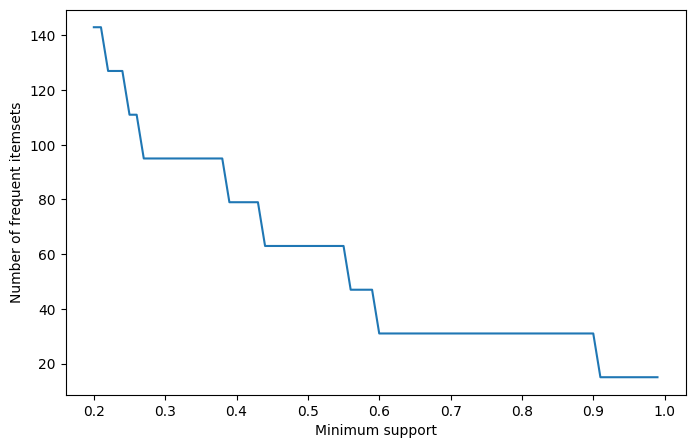

In [150]:
x = []
y = []
for min_sup in np.arange(0.2, 1, 0.01):
    frequent_itemsets = apriori(data, min_support = min_sup, use_colnames = True)
    x.append(min_sup)
    y.append(len(frequent_itemsets))

fig = plt.figure(figsize=(8, 5))
ax = fig.add_subplot(1, 1, 1)
ax.plot(x, y)
ax.set_xlabel("Minimum support")
ax.set_ylabel("Number of frequent itemsets")

### FP-Growth algorithm

In [151]:
# Import FP-Growth from mlxtend
from mlxtend.frequent_patterns import fpgrowth

# Consider min_support = 0.4 and perform FP-Growth algorithm
frequent_itemsets = fpgrowth(data, min_support=0.4, use_colnames = True)
frequent_itemsets

support                                           itemsets
0   1.000000                                         (Register)
1   1.000000                                   (Analyze Defect)
2   0.998188                                      (Test Repair)
3   0.998188                                      (Inform User)
4   0.905797                                   (Archive Repair)
..       ...                                                ...
74  0.438406  (Repair (Simple), Analyze Defect, Inform User,...
75  0.438406  (Register, Repair (Simple), Inform User, Test ...
76  0.438406  (Register, Repair (Simple), Analyze Defect, In...
77  0.438406  (Register, Repair (Simple), Analyze Defect, Te...
78  0.438406  (Test Repair, Inform User, Analyze Defect, Reg...

[79 rows x 2 columns]

### Selecting and filtering the Frequent Itemsets

Return all frequent itemsets that contain more than 2 items and have support at least 0.8.

In [152]:
frequent_itemsets['length'] = frequent_itemsets['itemsets'].apply(lambda x: len(x))
frequent_itemsets[ (frequent_itemsets['length'] > 2) &
                   (frequent_itemsets['support'] >= 0.8) ]

support                                           itemsets  length
10  0.998188            (Register, Test Repair, Analyze Defect)       3
14  0.998188         (Test Repair, Analyze Defect, Inform User)       3
15  0.998188               (Register, Test Repair, Inform User)       3
16  0.998188            (Register, Analyze Defect, Inform User)       3
17  0.998188  (Register, Test Repair, Analyze Defect, Inform...       4
22  0.905797         (Test Repair, Archive Repair, Inform User)       3
23  0.905797      (Archive Repair, Analyze Defect, Inform User)       3
24  0.905797            (Register, Archive Repair, Inform User)       3
25  0.905797      (Archive Repair, Test Repair, Analyze Defect)       3
26  0.905797            (Register, Test Repair, Archive Repair)       3
27  0.905797         (Register, Archive Repair, Analyze Defect)       3
28  0.905797  (Archive Repair, Test Repair, Analyze Defect, ...       4
29  0.905797  (Register, Test Repair, Archive Repair, Inform...       4
30  0.905797  (Register, Archive Repair, Analyze Defect, Inf...       4
31  0.905797  (Register, Archive Repair, Test Repair, Analyz...       4
32  0.905797  (Test Repair, Archive Repair, Inform User, Ana...       5